# Data preparation

Last week we took a look at a well log dataset and how the different well log signals correlate. Today we will look at some typical steps to prepare the same data (https://edx.netl.doe.gov/dataset/secarb-cranfield-well-logs , `borehole.txt` in this folder) for further analysis.

In [81]:
# the usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats
%matplotlib inline

### 1. Load data and reduce size (repitition)

As shown last week we will work with a smaller dataset. Here a short repitition of the steps (one possible way) to reduce our dataset- We also discussed that it looks like the `DT` and `RWA` are nearly perfectly correlated, indicated that one was calculated based on the other (https://en.wikipedia.org/wiki/Archie%27s_law) so we will also drop the `RWA` column:

In [2]:
# loading data
data = pd.read_csv('borehole.txt', delim_whitespace=True)
# keeping only relevant columns
data = data[['DEPT', 'DT', 'GR_EDTC', 'GTEM']]
# keeping only first 2000 entries for simplification
data = data.head(2000)

Text(0.5, 0, 'GTEM')

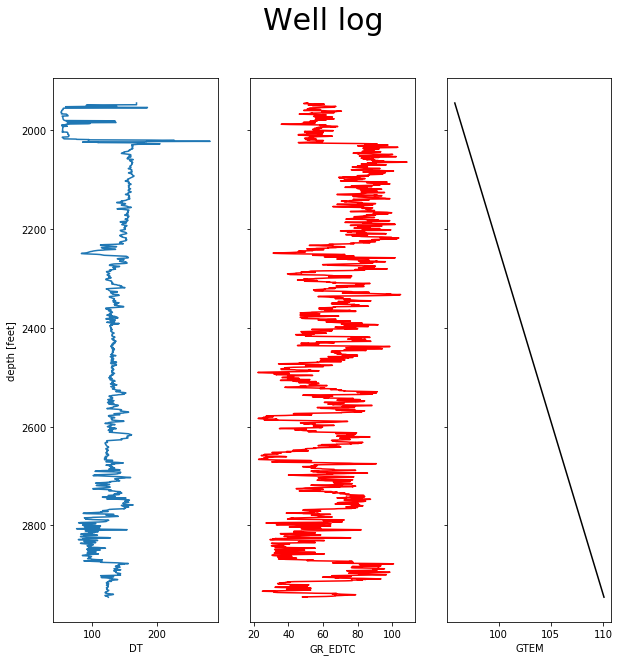

In [3]:
# And one possible solution for plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10), sharey=True)
fig.suptitle("Well log", fontsize=30)

ax01=ax[0]
ax01.invert_yaxis()
ax01.plot(data['DT'], data['DEPT'])
ax01.set_xlabel('DT')
ax01.set_ylabel('depth [feet]')

ax02=ax[1]
ax02.plot(data['GR_EDTC'], data['DEPT'], color='r')
ax02.set_xlabel('GR_EDTC')

ax03=ax[2]
ax03.plot(data['GTEM'], data['DEPT'], color='black')
ax03.set_xlabel('GTEM')

### 2. Is our data normally distributed?

For the following section we will work with the gamma ray well log and ask the question : Is our data normally distributed (Gaussian distribution, "bell curve")? Many statistical methods assume that your data fits a normal distribution, so checking for it in the early stages of an analysis is a good idea.

<div class='alert alert-info'>
    
**Your task**: Visualize the `GR_EDTC` data in form of a histogram. Choose a reasonanble number of bins. Recall what a histogram actually is. Based on the result, do you think the data is normally distributed? Why or why not? Discuss with your group!
</div>

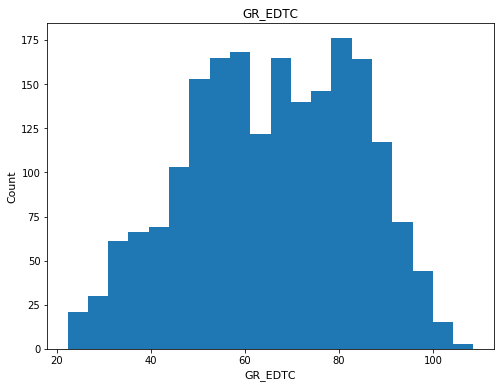

In [4]:
# YOUR CODE HERE
data.hist(column='GR_EDTC', bins=20, grid=False, figsize=(8, 6))
plt.xlabel('GR_EDTC', fontsize=11)
plt.ylabel('Count',fontsize=11);

Here is the equation for a normal distribution:

$f(x)=\frac{1}{\sigma \sqrt{2 \pi}}*e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2}$

with $\mu$ being the mean and $\sigma$ being the standard deviation.

<div class='alert alert-info'>
    
**Your task** Based on the given equation, finish below the function to calculate a value of a normal distribution.
</div>

In [5]:
def gaussian(x, mu, sigma):
    a = 1/(sigma*np.sqrt(2*np.pi))
    b = 2.718281**(-0.5*((((x-mu)/sigma))**2))
    function_x = a * b
    return function_x
    
    """1-d gaussian probability density function"""
    # YOUR CODE HERE
   

<div class='alert alert-info'>
    
**Your task** Calculate the mean and the standard deviation of the `GR_EDTC` data and plot the corresponding normal distribution on top of you histogram. Do you still think you data is normally distributed? Why or why not? Discuss again!
</div>

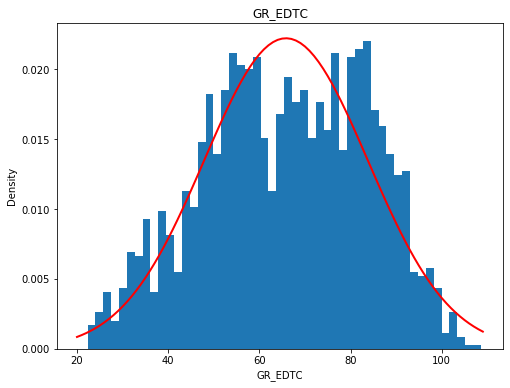

In [6]:
# YOUR CODE HERE
mu = np.mean(data['GR_EDTC'])
std_dev = np.std(data['GR_EDTC'])
data.hist(column='GR_EDTC', bins=50, grid=False, density=True, figsize=(8, 6))
plt.xlabel('GR_EDTC')
plt.ylabel('Density')
x = np.arange(20,110)
plt.plot(x, gaussian(x, mu, std_dev), 'r',linewidth=2);

There is another visual test for wether data is normally distributed called the *Q-Q-plot*. As a first step to create this plot we need to normalize our data using the following equation. 

$$Z={\frac {X-\mu }{\sigma }}$$ 

where $X$ is a random variable (here our well log signal), $Z$ the normalized random variablr and $\sigma$ the corresponding standard deviation.

<div class='alert alert-info'>
    
**Your task**: Create a `numpy.array` of normalized `GR_EDTC` data. Plot the corresponding histogram.
</div>

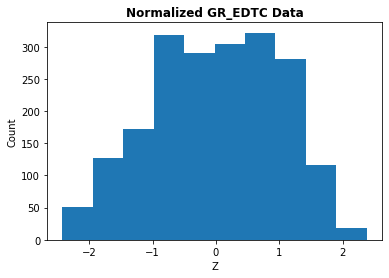

In [7]:
# YOUR CODE HERE
Z = np.array((data['GR_EDTC'] - mu)/std_dev)
plt.hist(Z)
plt.xlabel('Z')
plt.ylabel('Count')
plt.title('Normalized GR_EDTC Data', weight='bold');

In a *Q-Q-plot* plot we compare the *quantiles* of two distributions against each other. In our case we can just ignore the whole quantile part (as we use a rather small dataset). We want to compare the distribution of our normalized `GR_EDTC` data against a pefect normal distribution. In order to do so we need to plot the sorted array of our normalized data against a sorted array of values drawn from a perfect normal distribution.

<div class='alert alert-info'>
    
**Your task**: Create a *Q-Q-plot* by plotting the sorted normalized `GR_EDTC` data against sorted data drawn from a normal distribution. Hint: Use the `np.random.normal()` function to draw values from a random distribution. How would this plot look for data that is perfectly normal? Is our data normally distributed?
</div>

In [8]:
np.polyfit?

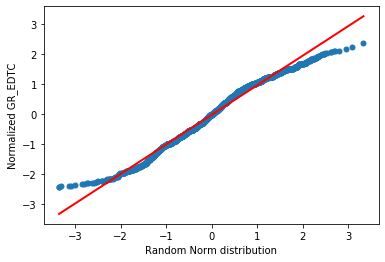

In [9]:
# YOUR CODE HERE
Z_sorted = np.sort(Z)
a = np.random.normal(0, 1, size=(len(Z)))
a_sorted = np.sort(a)
slope, intercept = np.polyfit(a_sorted, Z_sorted, 1)
y = intercept + slope*a_sorted
plt.plot(a_sorted, Z_sorted, '.', markersize=10)
plt.plot(a_sorted, y, 'r-', linewidth=2)
plt.xlabel('Random Norm distribution')
plt.ylabel('Normalized GR_EDTC')
plt.savefig('Q-Q Plot', dpi=400)

### 3.1 Determining the overall trend

Let's take a closer look at the `DT` log now. There is an interesting feature in the data: you can (hopefully) see that there is definitely a trend of with depth.  
You already learned a method to determine a linear trend: linear regression!

Take a look at `np.polyfit()` to determine the parameters for a linear regression (No, this is no solution for the assignment!).

<div class="alert alert-info">
    
**Your task**: Use linear regression to determine the overall trend of the `DT` data with depth:
</div>

Text(0, 0.5, 'DT Trend_value')

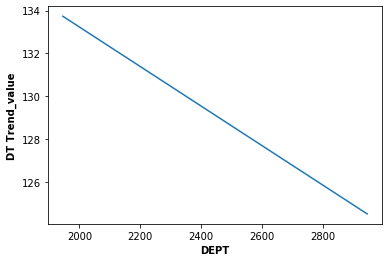

In [61]:
# YOUR CODE HERE
slope1, intercept1 = np.polyfit(data['DEPT'], data['DT'], 1)

Trend_value = intercept1 + slope1*data['DEPT'] # trend value at each depth location

plt.plot(data['DEPT'], Trend_value)
plt.xlabel('DEPT', weight='bold')
plt.ylabel('DT Trend_value', weight='bold')

In [56]:
slope1, intercept1

(-0.00923501559595388, 151.70139048600626)

Check if the determined overall trend makes sense by plotting the porosity values and a plot of the trend in one figure.

<div class="alert alert-info">
    
**Your task**: Create a plot of original data and determined trend as a line. Write a function to calculate the values of a straight line to plot the trend line.
</div>


In [11]:

def linear(a,b,x):
    '''Function for a line.
    
    Arguments:
        a: slope 
        b: y-axis intercept
        x: positions to be calculated
        
    return
        result: f(x)
    '''
    f_x = b + a*x
    return f_x



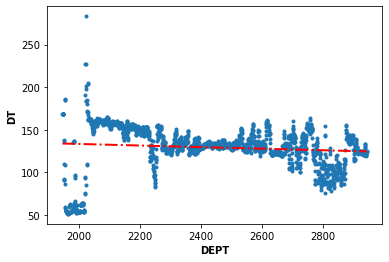

In [59]:
# YOUR CODE HERE
#plot of the original values (overall DT Data)
plt.plot(data['DEPT'].values, data['DT'].values,'.')
plt.xlabel('DEPT', weight='bold')
plt.ylabel('DT', weight='bold')

#plot of the trendline
a, b = np.polyfit(data['DEPT'],data['DT'],  1)
plt.plot(data['DEPT'], linear(a,b,data['DEPT'].values), 'r-.', linewidth=2.0)

### 3.2 Detrending the data

We can now create a de-trended data set of the `DT` values by subtracting the calculated trend value at each position from the original data set values.

<div class="alert alert-info">
    
**Your task:** Determine the de-trended values and create a plot of de-trended data with depth:
</div>

In [23]:
# YOUR CODE HERE
def detrend(data):
    result = []
    for i in range(len(data)):
        dt_val = data[i]
        trend_val = Trend_value[i]
        result.append(dt_val-trend_val) #subtracting each trend value from original values at each depth location.
    return result

In [22]:
detrended_DT = detrend(data['DT'])
depth = data['DEPT']
# detrended_DT

### 4. Save processed data for further analysis

We determined the de-trended data set - and at some point we will use this data to perform a geostatistical analysis. So, clearly, we now need a way to store the data here and open it in another notebook. 

<div class="alert alert-info">
    
**Your task**: Try to find a way to save the de-trended data (using `numpy` or `pandas`)
</div>

In [125]:
# YOUR CODE HERE
# save numpy array as csv file
from numpy import savetxt

detrended_data = np.array((depth, detrended_DT))
# save to csv file
savetxt('detrended_data.csv', detrended_data.T, delimiter=',',fmt='%f')

### References

The dataset can be found here:

* https://edx.netl.doe.gov/dataset/secarb-cranfield-well-logs

And some more useful links

* https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
* https://www.geeksforgeeks.org/numpy-quantile-in-python/
* https://en.wikipedia.org/wiki/Archie%27s_law
* https://en.wikipedia.org/wiki/Normal_distribution